In [1]:
# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve


# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.cross_validation import train_test_split , StratifiedKFold
from sklearn.feature_selection import RFECV

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

/home/maviator/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# get titanic & test csv files as a DataFrame
train = pd.read_csv("../Data/train.csv")
test    = pd.read_csv("../Data/test.csv")
full = train.append(test, ignore_index=True)
print train.shape, test.shape, full.shape

(891, 12) (418, 11) (1309, 12)


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Check for missing data

In [5]:

#Checking for missing data
NAs = pd.concat([train.isnull().sum(), test.isnull().sum()], axis=1, keys=['Train', 'Test'])
NAs[NAs.sum(axis=1) > 0]

,Train,Test
Age,177,86.0
Cabin,687,327.0
Embarked,2,0.0
Fare,0,1.0


## Combining Train and Test data to fill missing values

In [6]:
# Spliting to features and lables
train_labels = train.pop('Survived')

features = pd.concat([train, test], keys=['train', 'test'])
features.shape

(1309, 11)

## Removing features

In [7]:
# At this point we will drop the Cabin feature since it is missing a lot of the data
features.pop('Cabin')

# At this point names don't affect our model so we drop it
#features.pop('Name')

# At this point we drop Ticket feature
features.pop('Ticket')

features.shape

(1309, 9)

In [8]:
features['Name'].head()
i = features['Name'][0]
i.split(',')[1].split('.')[0].strip()

'Mr'

## Name/Title extraction

In [9]:
# Get Title from Name
dataset_title = [i.split(',')[1].split('.')[0].strip() for i in features['Name']]
features['Title'] = dataset_title
features['Title'].head()

train  0      Mr
       1     Mrs
       2    Miss
       3     Mrs
       4      Mr
Name: Title, dtype: object

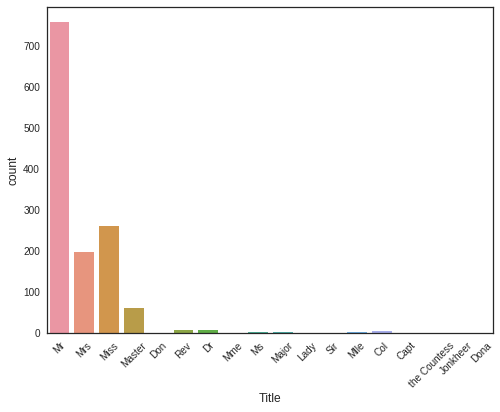

In [10]:
g = sns.countplot(x="Title",data=features)
g = plt.setp(g.get_xticklabels(), rotation=45) 

In [11]:
# Convert to categorical values Title
features["Title"] = features["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
features["Title"] = features["Title"].map({"Master":'0', "Miss":'1', "Ms":'1', "Mme":'1', "Mlle":'1', "Mrs":'1', "Mr":'2', "Rare":'3'})
#features["Title"] = features["Title"].astype(int)

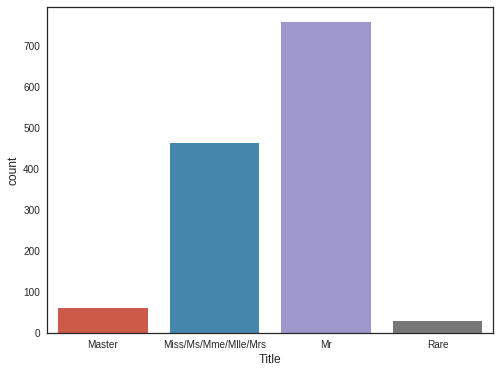

In [12]:
g = sns.countplot(features["Title"])
g = g.set_xticklabels(["Master","Miss/Ms/Mme/Mlle/Mrs","Mr","Rare"])

In [13]:
features.pop('Name')
features.shape

(1309, 9)

## Filling missing values

In [14]:
# Filling missing Age values with mean
features['Age'] = features['Age'].fillna(features['Age'].mean())

# Filling missing Embarked values with most common value
features['Embarked'] = features['Embarked'].fillna(features['Embarked'].mode()[0])

# Filling missing Fare values with mean
features['Fare'] = features['Fare'].fillna(features['Fare'].mean())

In [15]:
#Checking for missing data
NAs = pd.concat([features.isnull().sum()], axis=1, keys=['features'])
NAs[NAs.sum(axis=1) > 0]

,features


In [16]:
features.shape

(1309, 9)

## Converting Sex to binary feature

In [17]:
def cat2num(x):
    if x == 'male':
        return 1
    else:
        return 0

In [18]:
features['Sex'] = features['Sex'].apply(cat2num)

## Converting PClass to categorical

In [19]:
def num2cat(x):
    return str(x)

In [20]:
features['Pclass_num'] = features['Pclass'].apply(num2cat)
features.pop('Pclass')
features.shape

(1309, 9)

## combining SibSP and Parch into new feature

In [21]:
features['Family'] = features['SibSp'] + features['Parch'] + 1
features.pop('SibSp')
features.pop('Parch')
features.shape

(1309, 8)

In [22]:
features.describe()

,PassengerId,Sex,Age,Fare,Family
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.644003,29.881138,33.295479,1.883881
std,378.020061,0.478997,12.883193,51.738879,1.583639
min,1.000000,0.000000,0.170000,0.000000,1.000000
25%,328.000000,0.000000,22.000000,7.895800,1.000000
50%,655.000000,1.000000,29.881138,14.454200,1.000000
75%,982.000000,1.000000,35.000000,31.275000,2.000000
max,1309.000000,1.000000,80.000000,512.329200,11.000000


## Converting categorical features to binary

In [23]:
# Getting Dummies from all other categorical vars
for col in features.dtypes[features.dtypes == 'object'].index:
    for_dummy = features.pop(col)
    features = pd.concat([features, pd.get_dummies(for_dummy, prefix=col)], axis=1)

In [24]:
features.shape

(1309, 15)

In [25]:
features.head()

PassengerId  Sex   Age     Fare  Family  Embarked_C  Embarked_Q  \
train 0            1    1  22.0   7.2500       2           0           0   
      1            2    0  38.0  71.2833       2           1           0   
      2            3    0  26.0   7.9250       1           0           0   
      3            4    0  35.0  53.1000       2           0           0   
      4            5    1  35.0   8.0500       1           0           0   

         Embarked_S  Title_0  Title_1  Title_2  Title_3  Pclass_num_1  \
train 0           1        0        0        1        0             0   
      1           0        0        1        0        0             1   
      2           1        0        1        0        0             0   
      3           1        0        1        0        0             1   
      4           1        0        0        1        0             0   

         Pclass_num_2  Pclass_num_3  
train 0             0             1  
      1             0             0  
      2             0             1  
      3             0             0  
      4             0             1

## Splitting train and test data

In [26]:
### Splitting features
train_features = features.loc['train'].drop('PassengerId', axis=1).select_dtypes(include=[np.number]).values
test_features = features.loc['test'].drop('PassengerId', axis=1).select_dtypes(include=[np.number]).values

## Modelling

## Hyperparameter tuning

### 1. Adaboost

In [27]:
## META MODELING  WITH ADABOOST, RF, EXTRATREES and GRADIENTBOOSTING

# Adaboost
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC, param_grid = ada_param_grid, cv=5,
                        scoring="accuracy", n_jobs= -1, verbose = 1)

gsadaDTC.fit(train_features, train_labels)

ada_best = gsadaDTC.best_estimator_

Fitting 5 folds for each of 112 candidates, totalling 560 fits


[Parallel(n_jobs=-1)]: Done 416 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 560 out of 560 | elapsed:    4.3s finished


In [28]:
gsadaDTC.best_score_

0.81032547699214363

### 2. ExtraTrees

In [29]:
#ExtraTrees 
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=5,
                      scoring="accuracy", n_jobs= -1, verbose = 1)

gsExtC.fit(train_features, train_labels)

ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  2.6min finished


0.83726150392817056

### 3. Random Forest Classifier

In [30]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=5,
                     scoring="accuracy", n_jobs= -1, verbose = 1)

gsRFC.fit(train_features, train_labels)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  2.8min finished


0.83838383838383834

### 4. Gradient Boosting Classifier

In [31]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=5,
                     scoring="accuracy", n_jobs= -1, verbose = 1)

gsGBC.fit(train_features, train_labels)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   19.2s finished


0.82154882154882158

### 5. SVC Classifier

In [32]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=5,
                      scoring="accuracy", n_jobs= -1, verbose = 1)

gsSVMC.fit(train_features, train_labels)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:   27.8s finished


0.80134680134680136

## Train Final models

## Model Stacking

In [33]:
votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('gbr', GBC_best),
                                       ('svc', SVMC_best), ('ada', ada_best),
                                       ('Ext', ExtC_best)],
                           n_jobs=-1)

votingC = votingC.fit(train_features, train_labels)

## Prediction

In [34]:
#test_y = RF.predict(test_features)
#test_y = GBR.predict(test_features)
#test_y = SVCl.predict(test_features)
test_y = votingC.predict(test_features)

## Submission

In [35]:
test_id = test.PassengerId
test_submit = pd.DataFrame({'PassengerId': test_id, 'Survived': test_y})
test_submit.shape
test_submit.head()
test_submit.to_csv('titanic_voting.csv', index=False)

## History

- RF base model score: 0.76076
- GBR base model score: 0.71770
- SVC base model score: 0.60287
- Voting classifier with RF, GBR, SVC. Score: 0.73684
- Voting classifier with hyperparameter tuned model (RF, GB, SVC, ExT, Ada). Score: 0.77990
- Added feature engineering to extract Title from Name. Score: 0.78947